## 1. Python Module

In [16]:
#Python 모듈
import os 
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')


# 데이터 전처리 모듈
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from scipy import io


# 시각화 모듈
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import mplcursors
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

#한글 폰트 설정 모듈
plt.rc('font', family='Malgun Gothic')


# 이미지 파일 불러오기 모듈
from IPython.display import Image

## 2. Path

In [17]:
os.chdir("C:/Users/taeyu") #데이터 경로
print(os.getcwd())

C:\Users\taeyu


## 3. csv load(Tektrnoix MSO54 data)

In [18]:
df = pd.read_csv('current_data.csv', header=None, index_col = False, skiprows=12) # Dataframe 데이터 , skiprows=22, 변경

In [19]:
df.head()

,0,1
0,0.00000,0.004090
1,0.00001,0.005230
2,0.00002,0.000891
3,0.00003,0.003000
4,0.00004,0.004800


## 4. data information

In [20]:
n_samples = len(df[1])
print('데이터 개수는 :',n_samples)

dt = df.iloc[4,0] - df.iloc[3,0]
print('Samling time :',dt)

time_f= (1/dt)*10**-6
print('Samling Frequency [MHz] :',time_f)

데이터 개수는 : 400000
Samling time : 1.0000000000000003e-05
Samling Frequency [MHz] : 0.09999999999999996


## 5. (DataFrame -> nparray)

In [21]:
data = df.to_numpy()

## 6. Time domain

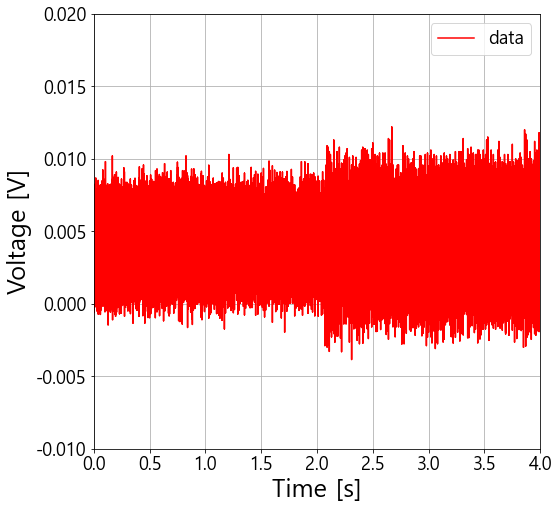

In [29]:
X = data[:,0]
Y = data[:,1]

plt.figure(figsize=(8,8))
plt.plot(X,Y,'r', label='data')
plt.xlabel("Time [s]", fontsize=25)
plt.ylabel("Voltage [V]", fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 18)
plt.ylim([-0.01,0.02])
plt.xlim([0,4.0])
plt.grid()

## 7. Filter Design for Noise Removal

In [32]:
def movingaverage(values,window):
    weights = np.repeat(1.0,window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

MVF_Y = movingaverage(Y,100) # filter size = 100 
print(MVF_Y.shape)
MVF_X = data[99:,0]

print(MVF_X.shape)



(399901,)
(399901,)


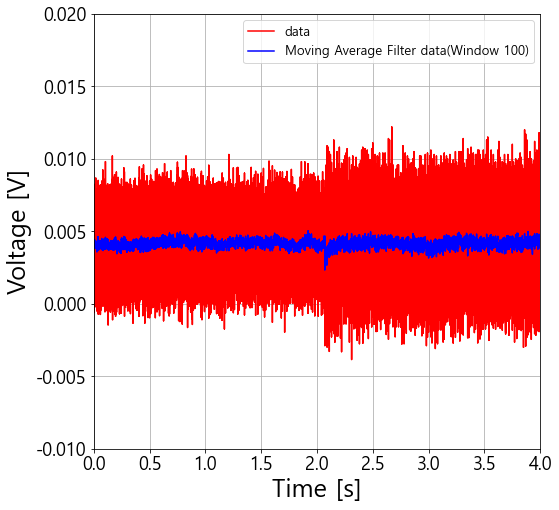

In [33]:
plt.figure(figsize=(8,8))
plt.plot(X,Y,'r', label='data')
plt.plot(MVF_X,MVF_Y,'b', label='Moving Average Filter data(Window 100)')
plt.xlabel("Time [s]", fontsize=25)
plt.ylabel("Voltage [V]", fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 13)
plt.ylim([-0.01,0.02])
plt.xlim([0,4.0])

plt.grid()